Reading the csv files with image directories and labels

In [10]:
import numpy as np
import pandas as pd
import os

#for dirname, _, filenames in os.walk('./EMNIST'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [11]:
testing_letter = pd.read_csv('../archive/emnist-letters-test.csv')
training_letter = pd.read_csv('../archive/emnist-letters-train.csv')
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


Introduce into x and y variables

In [3]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


Plot some of the data

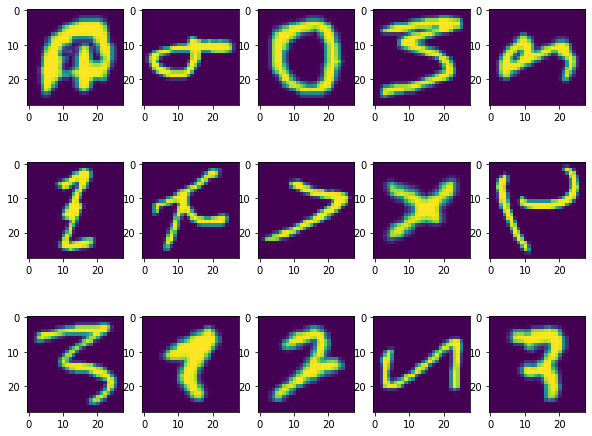

In [4]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

PREPROCESSING OF THE DATA

In [5]:
import tensorflow as tf

# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)


# Transform labels
number_of_classes = 27

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [9]:
train_images.shape

(88799, 28, 28, 1)

Generating ANN

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


Adding Callback API's to save best weights and change lr

In [7]:
MCP = ModelCheckpoint('CNN.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

Let's train!

In [8]:
history = model.fit(train_x,train_y,
epochs=20,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/20
2220/2220 [==============================] - ETA: 0s - loss: 0.5559 - accuracy: 0.8269
Epoch 1: val_accuracy improved from -inf to 0.88401, saving model to CNN.h5
2220/2220 [==============================] - 11s 3ms/step - loss: 0.5559 - accuracy: 0.8269 - val_loss: 0.3640 - val_accuracy: 0.8840 - lr: 0.0010
Epoch 2/20
2211/2220 [============================>.] - ETA: 0s - loss: 0.2747 - accuracy: 0.9089
Epoch 2: val_accuracy improved from 0.88401 to 0.90282, saving model to CNN.h5
2220/2220 [==============================] - 8s 3ms/step - loss: 0.2748 - accuracy: 0.9089 - val_loss: 0.3117 - val_accuracy: 0.9028 - lr: 0.0010
Epoch 3/20
2213/2220 [============================>.] - ETA: 0s - loss: 0.2042 - accuracy: 0.9308
Epoch 3: val_accuracy improved from 0.90282 to 0.90642, saving model to CNN.h5
2220/2220 [==============================] - 8s 3ms/step - loss: 0.2041 - accuracy: 0.9308 - val_loss: 0.3045 - val_accuracy: 0.9064 - lr: 0.0010
Epoch 4/20
2207/2220 [===========

Let's plot acc vs val_acc

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

Text(0, 0.5, 'Accuracy')

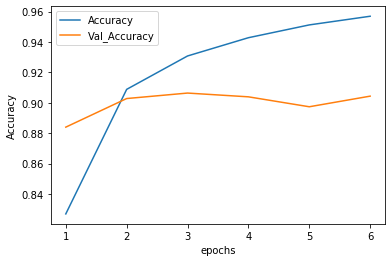

In [9]:
import seaborn as sns

q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

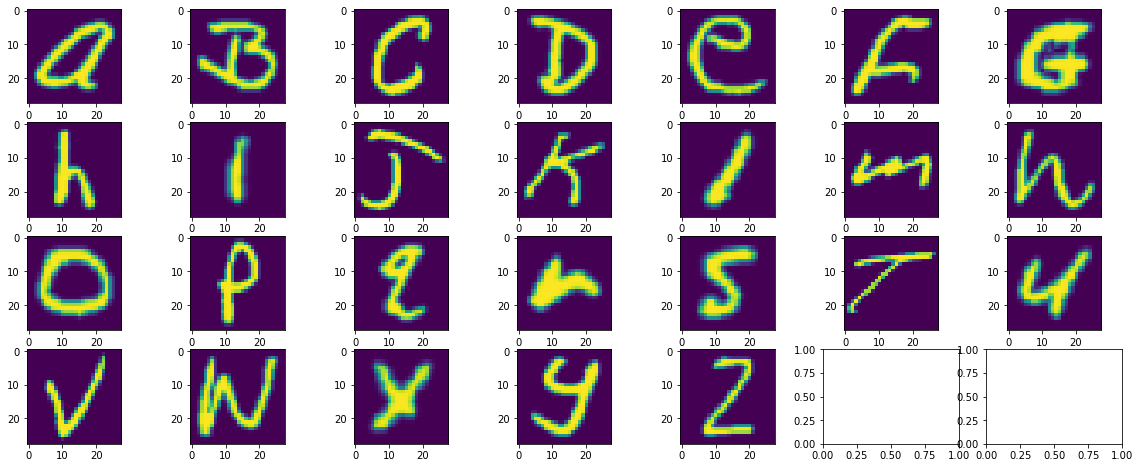

In [10]:
fig,axes = plt.subplots(4,7,figsize=(20,8))
for i,ax in enumerate(axes.flat):
    if i==26:
        break
    pos = np.where(np.where(y1==1)[1]==i+1)
    ax.imshow(np.transpose(x1[pos[0][0]].reshape([28,28])))
        
    